# Unmaking the Everyday AI: A Design Inquiry into Research Tools and AI Nudge

## Text Mining Method

This notebook analyses a .txt file by counting word frequencies, after removing stop words and tokenizing text. The output is a .csv file listing words and their frequencies from higher to lower values. It adds a .png horizontal plot.

To use the Colab, upload the raw data in .txt format. The file must be uploaded at the root, in the File section of the Colab (left panel).

### Import Librairies and Download NLTK data

In [ ]:
# Text Mining and Word Frequency Analysis
# This notebook performs text mining on a text corpus

# Import required libraries
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('punkt_tab', quiet=True)
print("Complete!\n")


Complete!



### Step by Step Analysis

For changing the data to analyse (google, miro, etc.), change the string value in variable `input_service`

Loading text from: zoom.txt
Text Length: 18536 characters

Preview of text:
AI Companion Security and Privacy
This whitepaper describes Zoom AI Companion’s security and privacy features as of the date of publication and not other AI products or services offered by Zoom. In our continuing commitment to empowering productivity — while keeping security and privacy at the core of our products — the features described in this paper may evolve. This paper discusses AI Companion features for Zoom Workplace. Zoom Contact Center and other Zoom products are not included in this w...

Tokens after lemmatization: 1624
Preprocessing complete!

Total unique words: 566
Dataframe created with 566 rows

Dataframe preview:
        words  count
0   companion     74
1        zoom     38
2  thirdparty     31
3     feature     30
4    customer     30
5     meeting     29
6    security     28
7        data     27
8        user     26
9       model     23

Creating visualizations...


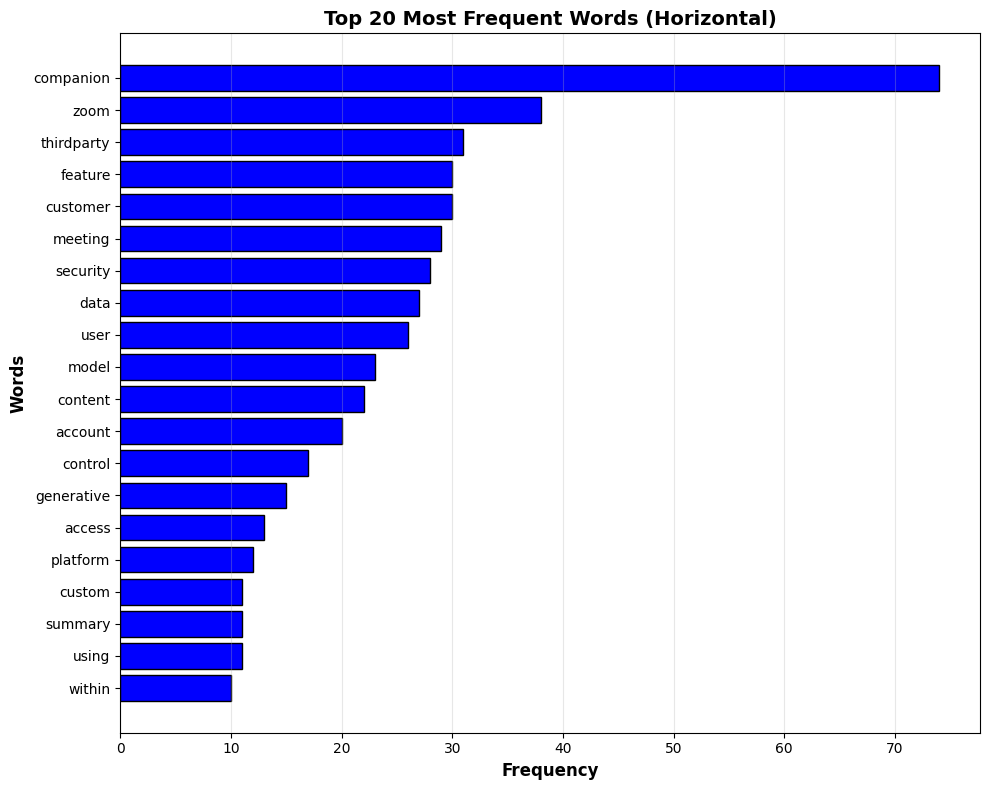


Analysis complete
Output files created:
  - zoom_word_frequencies.csv
  - zoom_word_frequency_horizontal_chart.png


In [ ]:
# ============================================
# 1. LOAD TEXT FILE
# ============================================
# Specify your input file path
input_service = 'zoom' # oreilly, miro, google, notion, zoom, montreal
input_file = input_service+'.txt'
print(f"Loading text from: {input_file}")

# associate color (oreilly,firebrick), (miro,orange),
# (google,dodgerblue), (notion,darkgray), (zoom,blue), (montreal,lavender)
input_color ='blue'

with open(input_file, 'r', encoding='utf-8') as f:
    text = f.read()

# Summarize text metrics
print(f"Text Length: {len(text)} characters\n")
print("Preview of text:")
print(text[:500] + "...\n")

# ============================================
# 2. TEXT PREPROCESSING
# ============================================
# Convert to lowercase
text_lower = text.lower()

# Remove special characters and digits, keep only letters and spaces
text_clean = re.sub(r'[^a-z\s]', '', text_lower)

# Tokenize the text
tokens = word_tokenize(text_clean)

# Remove stopwords
stop_words = set(stopwords.words('english'))

# Optional: Add custom stop words if needed
custom_stop_words = {'ai','artificial','intelligence','also', 'would',
                     'could', 'may', 'might', 'must', 'oreilly', 'miro',
                     'google','notion', 'zoom'}
stop_words = stop_words.union(custom_stop_words)

# Filter tokens: remove stopwords and keep only words longer than 2 characters
tokens_no_stopwords = [word for word in tokens if word not in stop_words and len(word) > 2]
# print(f"Tokens after removing stopwords: {len(tokens_no_stopwords)}")

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens_no_stopwords]
print(f"Tokens after lemmatization: {len(lemmatized_tokens)}")
print("Preprocessing complete!\n")

# ============================================
# 3. WORD FREQUENCY ANALYSIS
# ============================================
# Count word frequencies
word_freq = Counter(lemmatized_tokens)

# Get total unique words
unique_words = len(word_freq)
print(f"Total unique words: {unique_words}")

# ============================================
# 4. CREATE DATAFRAME
# ============================================
# Create dataframe with columns 'words' and 'count'
df = pd.DataFrame(word_freq.most_common(), columns=['words', 'count'])

print(f"Dataframe created with {len(df)} rows")
print("\nDataframe preview:")
print(df.head(10))

# ============================================
# 5. EXPORT TO CSV
# ============================================
output_csv = input_service+'_word_frequencies.csv'
df.to_csv(output_csv, index=False)

# ============================================
# 6. VISUALIZE WORD FREQUENCIES
# ============================================
print("\nCreating visualizations...")

# Plot top 20 words
top_n = 20
df_top = df.head(top_n)

# Create a horizontal bar chart for better readability
plt.figure(figsize=(10, 8))
plt.barh(df_top['words'][::-1], df_top['count'][::-1], color=input_color, edgecolor='black')
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.ylabel('Words', fontsize=12, fontweight='bold')
plt.title(f'Top {top_n} Most Frequent Words (Horizontal)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.savefig(input_service+'_word_frequency_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nAnalysis complete")
print(f"Output files created:")
print(f"  - {output_csv}")
print(f"  - {input_service}_word_frequency_horizontal_chart.png")